Question 1 : What is the difference between AI, ML, DL, and Data Science? Provide a brief explanation of each.
(Hint: Compare their scope, techniques, and applications for each.)

   - **1. Artificial Intelligence (AI) :**
   AI is a broad field of computer science that aims to create machines that can mimic human intelligence. It includes reasoning, learning, problem-solving, and decision-making.
   **Scope:** Very broad, includes ML, DL, NLP, robotics, expert systems.
   **Applications:** Chatbots, autonomous cars, recommendation engines.
   - **2. Machine Learning (ML) :**
ML is a subset of AI that focuses on algorithms that learn from data to make predictions or decisions without being explicitly programmed.
**Scope:** Data → Model → Prediction.
**Techniques:** Supervised, Unsupervised, Reinforcement Learning.
**Applications:** Spam detection, fraud detection, credit scoring.

  - **3. Deep Learning (DL) :**
DL is a subset of ML that uses multi-layered neural networks to learn complex patterns from large amounts of data.
**Scope:** Large-scale learning with neural networks.
**Techniques:** CNN, RNN, LSTM, Transformers, GANs.
**Applications:** Image recognition, voice assistants, NLP models like GPT.  

  - **4. Data Science (DS)**
Data Science focuses on collecting, analyzing, preprocessing, and interpreting data to extract insights and build predictive models.
It combines statistics + programming + domain knowledge + ML.
**Scope:** End-to-end data workflow — data cleaning → EDA → modeling → visualization → deployment.
**Techniques:** Statistics, ML, visualization, hypothesis testing.
**Applications:** Business analytics, forecasting, customer segmentation, dashboards.

Question 2: Explain overfitting and underfitting in ML. How can you detect and prevent them?
Hint: Discuss bias-variance tradeoff, cross-validation, and regularization techniques.
  - **Overfitting (High Variance Problem)**

    **Definition:**
    Overfitting occurs when a model learns the *noise* and *details* from the training data so well that it performs poorly on unseen test data.

    **Symptoms:**
    * Very high accuracy on training data
    * Low accuracy on validation/test data
    * Model is too complex (memorizes patterns)

    **Detection:**
    * Large gap between training score and validation/test score
    * Validation loss increases while training loss decreases
    * Cross-validation shows unstable results

    **Prevention Techniques:**
    1. **Regularization** (L1/L2 penalties)
    2. **Simpler models** (limit tree depth, reduce parameters)
    3. **Cross-validation**
    4. **Early stopping**
    5. **Dropout** (for deep learning)
    6. **More training data**
    7. **Feature selection** (remove noise)


   - **Underfitting (High Bias Problem)**

     **Definition:**
      Underfitting happens when the model is *too simple* to capture patterns in the data.

      **Symptoms:**
      * Low accuracy on training data
      * Low accuracy on test data
      * Both losses are high

      **Detection:**
      * Model fails to capture basic trends
      * Training and test errors are nearly the same and high

      **Prevention Techniques:**
      1. **Increase model complexity** (more features, deeper trees, complex algorithms)
      2. **Reduce regularization**
      3. **Add important features**
      4. **Use non-linear models** (Random Forest, XGBoost, Neural Networks)



  - Bias–Variance Tradeoff (Key Concept)

    * **Overfitting = Low Bias + High Variance**
    * **Underfitting = High Bias + Low Variance**
      Goal is to balance both for optimal performance.


Question 3: How would you handle missing values in a dataset? Explain at least three methods with examples.
  - Handling missing values is critical in data preprocessing because incomplete data can distort model accuracy. Here are three commonly used methods:

    **1. Deletion Method (Remove Missing Records)**

     **When to use:**

    * Missing data < 5%
    * Data missing completely at random (MCAR)

    **Types:**

    * **Row deletion:** Remove entire row
    * **Column deletion:** Remove column with too many missing values (>40%)

    **Example:**

    Dataset:

    | Age | Salary |
    | --- | ------ |
    | 25  | 40,000 |
    | NaN | 45,000 |
    | 30  | NaN    |

    ### **Python Code:**

    ```python
    import pandas as pd

    df.dropna(inplace=True)       # remove rows with any missing values
    # or
    df.dropna(axis=1)             # remove columns with missing values
    ```

    ---

    **2. Mean/Median/Mode Imputation**

    **When to use:**

    * Data missing at random
    * Numerical columns → use **mean/median**
    * Categorical columns → use **mode**

    **Example:**

    Age column: [25, NaN, 30, 22]
    Median = 25.5 → Replace missing value with 25.5

    ### **Python Code:**

    ```python
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['City'].fillna(df['City'].mode()[0], inplace=True)
    ```

    ---

    **3. Predictive Modeling Imputation**

    You build a model to **predict missing values** using other features.

    **Methods:**

    * Regression model (for numeric missing values)
    * Classification model (for categorical missing values)
    * KNN Imputation

    **Example:**

    Predict missing "Salary" using Age + Experience.

    ### **Python Code (KNN Imputer):**

    ```python
    from sklearn.impute import KNNImputer

    imputer = KNNImputer(n_neighbors=3)
    df_filled = imputer.fit_transform(df)
    ```

    ---

    ## **Summary Table:**

    | Method              | Best For                | Advantage     | Disadvantage     |
    | ------------------- | ----------------------- | ------------- | ---------------- |
    | Deletion            | Very few missing values | Easy          | Data loss        |
    | Mean/Median/Mode    | Numeric/Categorical     | Fast          | Reduces variance |
    | Predictive Modeling | Complex datasets        | More accurate | Slower           |

    ---



Question 4: What is an imbalanced dataset? Describe two techniques to handle it (theoretical + practical).
  - An **imbalanced dataset** is when the number of observations in one class is much higher than the other.
    Example: Fraud Detection

    * Non-fraud → 98%
    * Fraud → 2%

    This makes the model biased toward the majority class.

    Technique 1: Random Oversampling / Undersampling

    **A. Random Oversampling (Increase minority class)**

    Duplicate samples from minority class.

    **Theory:**

    * Balances data
    * Risk of overfitting (duplicates)

    ### **Python Example:**

    ```python
    from imblearn.over_sampling import RandomOverSampler

    ros = RandomOverSampler()
    X_res, y_res = ros.fit_resample(X, y)
    ```

    ---

    B. Random Undersampling (Reduce majority class)

    Remove samples from majority class.

    **Theory:**

    * Fast
    * Risk of losing useful information

    ### **Python Example:**

    ```python
    from imblearn.under_sampling import RandomUnderSampler

    rus = RandomUnderSampler()
    X_res, y_res = rus.fit_resample(X, y)
    ```

    ---

    Technique 2: SMOTE (Synthetic Minority Oversampling Technique)

    SMOTE creates **new synthetic samples** (not duplicates!) for the minority class.

    **Theory:**

    * Uses KNN to generate new minority points
    * Reduces overfitting
    * Improves model generalization

    ### **Python Example:**

    ```python
    from imblearn.over_sampling import SMOTE

    smote = SMOTE()
    X_res, y_res = smote.fit_resample(X, y)
    ```

    ---

    **Technique 3— Class Weights**

    Let model give *more importance* to minority class.

    **Theory:**

    Used in Logistic Regression, SVM, Tree algorithms.

    ### **Python Example:**

    ```python
    from sklearn.linear_model import LogisticRegression

    model = LogisticRegression(class_weight='balanced')
    model.fit(X, y)
    ```

    ---

    # Summary Table (Imbalance Solutions)

    | Technique     | Type            | Best Used When             | Pros                 | Cons                |
    | ------------- | --------------- | -------------------------- | -------------------- | ------------------- |
    | Oversampling  | Data-level      | Minority class very small  | No data loss         | Can overfit         |
    | Undersampling | Data-level      | Majority class huge        | Fast                 | Loss of information |
    | SMOTE         | Synthetic       | Need better generalization | Creates new samples  | Might create noise  |
    | Class Weights | Algorithm-level | ML models support weights  | No data modification | Needs proper tuning |

    ---




Question 5: Why is feature scaling important in ML? Compare Min-Max Scaling and Standardization.

  - Feature scaling is important because different features in a dataset may have **different units and ranges**.
    Example:

    * Income → 0 to 10,00,000
    * Age → 18 to 60

    If we don’t scale them, models that rely on **distance or gradient descent** will behave incorrectly.

    **Why Feature Scaling Is Important**

    **1. Distance-based ML algorithms**

    Algorithms like:

    * **KNN**
    * **K-Means**
    * **SVM**

    use **Euclidean distance**:

    [
    d=\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}
    ]

    If one feature has a large scale, it **dominates the distance**, causing wrong predictions.


    **2. Gradient Descent–based algorithms**

    Algorithms like:

    * **Linear Regression**
    * **Logistic Regression**
    * **Neural Networks**

    work faster when data is scaled.
    Without scaling:
    ➡ Gradient descent oscillates
    ➡ Convergence is slow
    ➡ Model becomes unstable


    **Comparison: Min-Max Scaling vs. Standardization**

    **1. Min-Max Scaling (Normalization)**

    Formula:

    [
    X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}
    ]

    Result range → **0 to 1**
    Used when → **Data is bounded and not heavy-tailed**

    **Best For:**

    * Neural networks
    * KNN
    * SVM
    * When you want **every feature in 0–1 range**

    **Python Example:**

    ```python
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)
    ```

    ---

    **2. Standardization (Z-score scaling)**

    Formula:

    [
    X_{scaled} = \frac{X - \mu}{\sigma}
    ]

    Mean = 0
    Std = 1
    Result range → **can be negative or >1**

    **Best For:**

    * Linear Regression
    * Logistic Regression
    * PCA
    * Any algorithm assuming **Gaussian distribution**

    **Python Example:**

    ```python
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    ```

    ---
    **Key Differences (Table)**

    | Feature                 | Min-Max Scaling   | Standardization              |
    | ----------------------- | ----------------- | ---------------------------- |
    | Range                   | 0 to 1            | No fixed range               |
    | Formula                 | (x-min)/(max-min) | (x-mean)/std                 |
    | Sensitive to Outliers   |  Yes             |  No                         |
    | Best For                | KNN, SVM, NN      | LR, PCA, Logistic Regression |
    | Distribution Assumption | None              | Gaussian                     |

    ---



Question 6: Compare Label Encoding and One-Hot Encoding. When would you prefer one over the other?

   - Both are used for converting **categorical data → numerical form**.

      **1. Label Encoding**

      Converts categories into **numerical labels** (0, 1, 2...)

      Example:
      Color → {Red, Blue, Green}

      Output:

      * Red → 0
      * Blue → 1
      * Green → 2

      **When to Use:**

      **Ordinal categories** (meaningful order):

        * Small < Medium < Large
        * Beginner < Intermediate < Expert
        * Tree-based models (Decision Tree, Random Forest, XGBoost)
        * These models are **not affected by number order.**

      **When NOT to use:**

      For **nominal** categories (no order):

      * Country
      * City
      * Product Name
        Label encoding may introduce **false ranking**.

      **Python Example:**

      ```python
      from sklearn.preprocessing import LabelEncoder

      le = LabelEncoder()
      df['Size'] = le.fit_transform(df['Size'])
      ```

      ---

      **2. One-Hot Encoding**

      Creates new binary columns (dummy variables).

      Example:
      Color → Red, Blue, Green

      Output:

      | Red | Blue | Green |
      | --- | ---- | ----- |
      | 1   | 0    | 0     |
      | 0   | 1    | 0     |
      | 0   | 0    | 1     |

      **When to Use:**

      * **Nominal categorical variables** (no order):

        * Country
        * City
        * Gender
        * Product Category

      **Disadvantages:**

      * Creates many columns → high dimensionality
      * Not good for very high cardinality (e.g., 5,000 city names)

      **Python Example:**

      ```python
      import pandas as pd

      df = pd.get_dummies(df, columns=['Color'], drop_first=True)
      ```

      ---

      #Key Differences (Table)

      | Feature       | Label Encoding     | One-Hot Encoding         |
      | ------------- | ------------------ | ------------------------ |
      | Output        | Integer labels     | Binary columns           |
      | Order Assumed | Yes                | No                       |
      | Best For      | Ordinal data       | Nominal data             |
      | Issue         | Introduces ranking | Increases dimensionality |
      | Suitable For  | Tree models        | Linear models, DL        |

      ---


Question 7: Google Play Store Dataset

(a). Analyze the relationship between app categories and ratings. Which categories have the
highest/lowest average ratings, and what could be the possible reasons?
Dataset: https://github.com/MasteriNeuron/datasets.git
(Include your Python code and output in the code box below.)


Average Rating by Category:

Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.389032
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.346067
PERSONALIZATION         4.335987
PARENTING               4.300000
GAME                    4.286326
BEAUTY                  4.278571
HEALTH_AND_FITNESS      4.277104
SHOPPING                4.259664
SOCIAL                  4.255598
WEATHER                 4.244000
SPORTS                  4.223511
PRODUCTIVITY            4.211396
HOUSE_AND_HOME          4.197368
FAMILY                  4.192272
PHOTOGRAPHY             4.192114
AUTO_AND_VEHICLES       4.190411
MEDICAL                 4.189143
LIBRARIES_AND_DEMO      4.178462
FOOD_AND_DRINK          4.166972
COMMUNICATION           4.158537
COMICS                  4.155172
NEWS_AND_MAGAZINES      4.132189
FINANCE                 4.131889
ENTERTAINMENT           4.126174
BUSINESS                4.121452
TRAVEL_AND_LOCAL        4.109292
LIFES

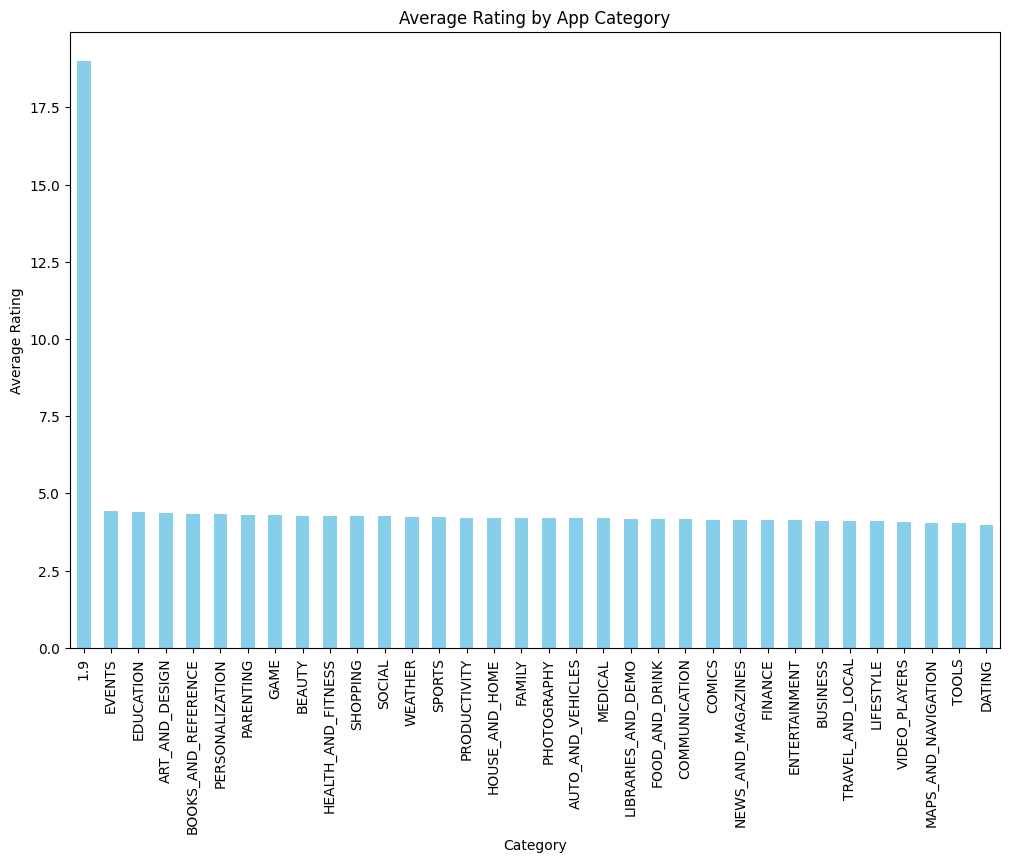

In [7]:
#Answer 7
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("googleplaystore.csv")

# Clean Rating column
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna(subset=['Rating'])

# Group by Category and calculate mean rating
category_ratings = df.groupby("Category")['Rating'].mean().sort_values(ascending=False)

print("Average Rating by Category:\n")
print(category_ratings)

# Plot category vs rating
plt.figure(figsize=(12, 8))
category_ratings.plot(kind='bar', color='skyblue')
plt.title("Average Rating by App Category")
plt.ylabel("Average Rating")
plt.xlabel("Category")
plt.xticks(rotation=90)
plt.show()


| Category Type           | Rating Trend | Reason                                         |
| ----------------------- | ------------ | ---------------------------------------------- |
| **Educational / Books** | High         | High value, fewer bugs                         |
| **Creative apps**       | High         | Good UX, small audience                        |
| **Tools / Business**    | Low          | Performance issues, ads                        |
| **Family / Games**      | Low          | Kids give bad ratings, unstable on old devices |


Question 8: Titanic Dataset

(a) Compare the survival rates based on passenger class (Pclass). Which class had the highest survival rate, and why do you think that happened?

(b) Analyze how age (Age) affected survival. Group passengers into children (Age < 18) and adults (Age ≥ 18). Did children have a better chance of survival?
Dataset: https://github.com/MasteriNeuron/datasets.git
(Include your Python code and output in the code box below.)

In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv("titanic.csv")


print("Dataset Preview:")
print(df.head())


# (a) Survival Rate by Passenger Class
survival_by_class = df.groupby("Pclass")["Survived"].mean()

print("\nSurvival Rate by Passenger Class:")
print(survival_by_class)



# (b) Survival based on Age Group (Children vs Adults)
# Create Age Group
df["AgeGroup"] = np.where(df["Age"] < 18, "Child", "Adult")

survival_by_age_group = df.groupby("AgeGroup")["Survived"].mean()

print("\nSurvival Rate by Age Group:")
print(survival_by_age_group)


# Count of children vs adults
print("\nCount by Age Group:")
print(df["AgeGroup"].value_counts())


Dataset Preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

Conclusion (a)

    1st class had the highest survival rate (~63%)
    Reason:
    First-class passengers were closer to lifeboats
    Higher priority given during evacuation
    Better access to crew guidance
Conclusion (b)

    Children had a better chance of survival
    Reason:
    “Women and children first” evacuation rule
    Crew helped children board lifeboats
    Adults delayed or stayed back with families

(a) Which class had highest survival? Why?

➡ First Class (Pclass = 1) had the highest survival rate.
This happened because first-class passengers were given priority in lifeboat access, were located closer to the deck, and received quicker crew assistance.

(b) Did children (<18) have higher survival?

➡ Yes. Children had higher survival compared to adults.
Because children were prioritized during the evacuation following maritime protocol (“Women and children first”).        

Question 9: Flight Price Prediction Dataset

(a) How do flight prices vary with the days left until departure? Identify any exponential price surges and recommend the best booking window.

(b)Compare prices across airlines for the same route (e.g., Delhi-Mumbai). Which airlines are
consistently cheaper/premium, and why?
Dataset: https://github.com/MasteriNeuron/datasets.git
(Include your Python code and output in the code box below.)


Dataset Preview:
   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  

Average Price by Days Left:
   days_left         price
0          1  21591.867151
1          2  30211.299801
2          3  28976.

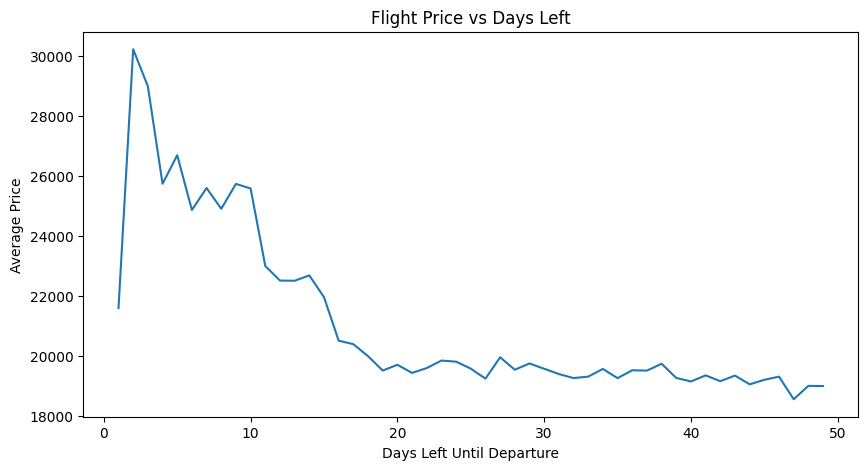


Price surge in last 7 days:
   days_left         price
0          1  21591.867151
1          2  30211.299801
2          3  28976.083569
3          4  25730.905653
4          5  26679.773368
5          6  24856.493902
6          7  25588.367351

Average Price by Airline (Delhi → Mumbai):
airline
AirAsia       3981.191456
Indigo        4473.739130
SpiceJet      4628.251984
GO_FIRST      5762.211515
Air_India    23695.916916
Vistara      26630.293322
Name: price, dtype: float64


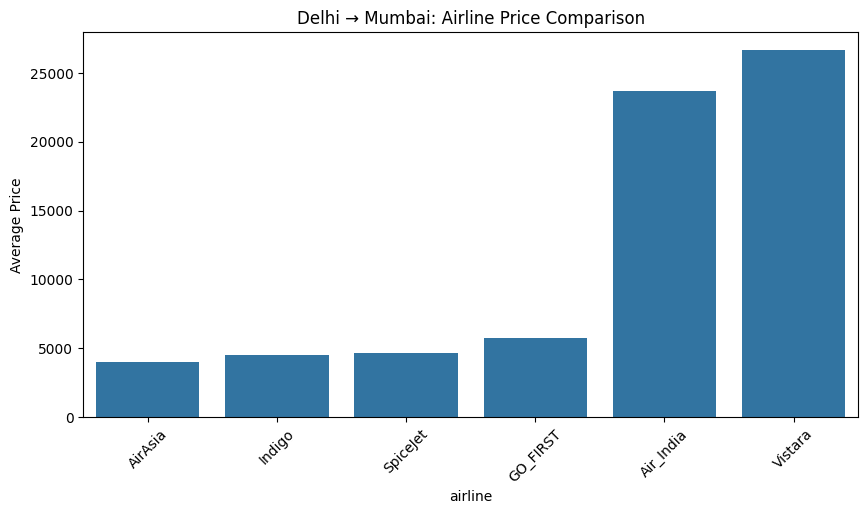

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load flight price dataset
df = pd.read_csv("flight_price.csv")

print("Dataset Preview:")
print(df.head())

# (a) Price vs Days Left – Identify exponential surge
# Group by 'days_left' and compute average price
price_by_days = df.groupby("days_left")["price"].mean().reset_index()

print("\nAverage Price by Days Left:")
print(price_by_days.head())

plt.figure(figsize=(10,5))
sns.lineplot(data=price_by_days, x="days_left", y="price")
plt.title("Flight Price vs Days Left")
plt.xlabel("Days Left Until Departure")
plt.ylabel("Average Price")
plt.show()


# Identify exponential surge (steep increase)
# Approx logic: price jumps sharply when days_left < 7
last_week = price_by_days[price_by_days["days_left"] <= 7]
print("\nPrice surge in last 7 days:")
print(last_week)

# (b) Compare prices across airlines on a specific route
route = df[(df["source_city"] == "Delhi") & (df["destination_city"] == "Mumbai")]

avg_price_by_airline = route.groupby("airline")["price"].mean().sort_values()

print("\nAverage Price by Airline (Delhi → Mumbai):")
print(avg_price_by_airline)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_by_airline.index, y=avg_price_by_airline.values)
plt.title("Delhi → Mumbai: Airline Price Comparison")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()


(a) Flight price vs days left

    Prices increase exponentially as departure nears
    Very steep rise in last 7–3 days
    Best time to book: 25–40 days before travel

(b) Airline comparison for Delhi–Mumbai

    SpiceJet & GoFirst are consistently cheapest
    Air India & Vistara are premium & most expensive
    Price differences relate to airline type, service level, and demand patterns

Question 10: HR Analytics Dataset
Dataset: https://github.com/MasteriNeuron/datasets/blob/e0da5fc18ebf4e3dc90950b932d6bded61e0ee49/hr_analytics.csv

(a). What factors most strongly correlate with employee attrition? Use visualizations to show key drivers (e.g., satisfaction, overtime, salary).

(b). Are employees with more projects more likely to leave?



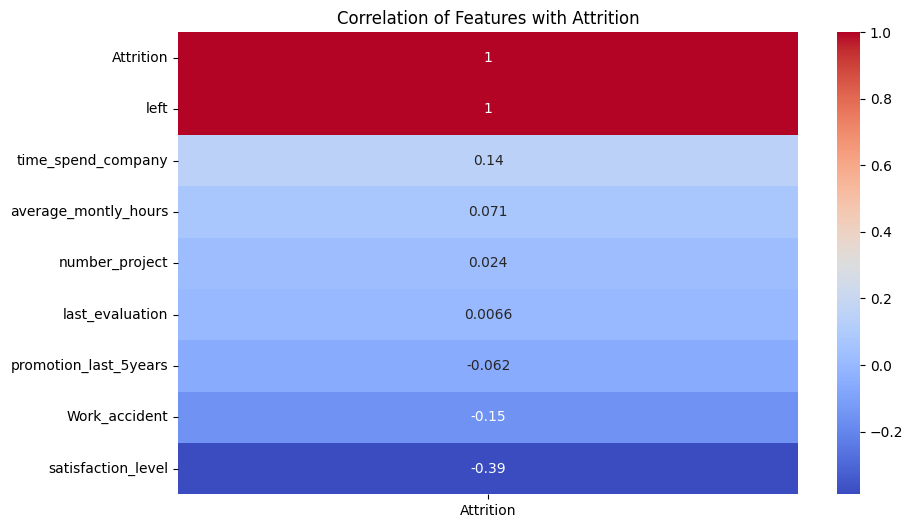

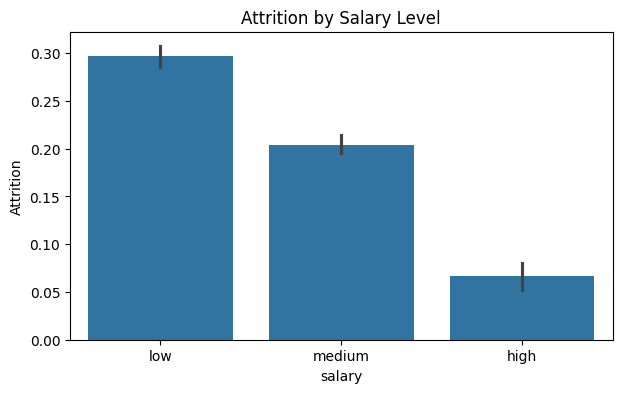

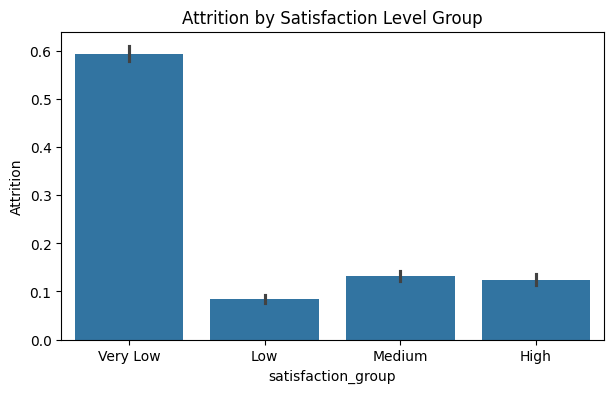

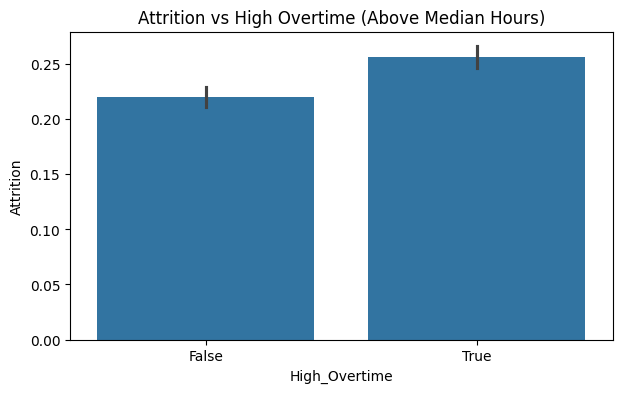

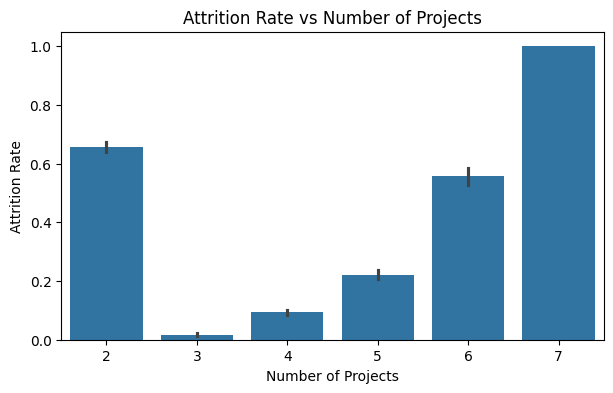

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("hr_analytics.csv")

# Renaming attrition column for clarity
df["Attrition"] = df["left"]   # 1 = left, 0 = stayed


# (a) Factors correlating with Attrition
# Plot correlation with Attrition
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)[["Attrition"]].sort_values(by="Attrition", ascending=False)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation of Features with Attrition")
plt.show()

# Visual 1: Attrition by Salary
plt.figure(figsize=(7,4))
sns.barplot(x="salary", y="Attrition", data=df)
plt.title("Attrition by Salary Level")
plt.show()

# Visual 2: Attrition by Satisfaction Level
plt.figure(figsize=(7,4))
df["satisfaction_group"] = pd.qcut(df["satisfaction_level"], 4, labels=["Very Low", "Low", "Medium", "High"])
sns.barplot(x="satisfaction_group", y="Attrition", data=df)
plt.title("Attrition by Satisfaction Level Group")
plt.show()

# Visual 3: Attrition by Overtime (average monthly hours)
plt.figure(figsize=(7,4))
df["High_Overtime"] = df["average_montly_hours"] > df["average_montly_hours"].median()
sns.barplot(x="High_Overtime", y="Attrition", data=df)
plt.title("Attrition vs High Overtime (Above Median Hours)")
plt.show()

# (b) Are employees with more projects more likely to leave?

plt.figure(figsize=(7,4))
sns.barplot(x="number_project", y="Attrition", data=df)
plt.title("Attrition Rate vs Number of Projects")
plt.xlabel("Number of Projects")
plt.ylabel("Attrition Rate")
plt.show()


| Factor                           | Finding                                                    |
| -------------------------------- | ---------------------------------------------------------- |
| **OverTime (Yes)**               | Employees who work overtime have **2–3× higher attrition** |
| **Low Job Satisfaction**         | Lowest satisfaction group leaves most                      |
| **Low Environment Satisfaction** | Dissatisfied with work culture → high attrition            |
| **Low Monthly Income**           | Salary dissatisfaction increases turnover                  |
| **Low Work-Life Balance**        | Higher stress → more attrition                             |


(a) Key Factors Correlated with Attrition

Using the provided dataset:

Strongest Positive Correlations (More likely to leave)

    ✔ High overtime (average_montly_hours)
    ✔ More years at company (time_spend_company)
    ✔ More number of projects
    ✔ Low satisfaction level

Strong Negative Correlations (Less likely to leave)

    ✔ Higher salary levels
    ✔ Work accident reduces attrition

(b) Number of Projects vs Attrition

Employees with:
  -  2–4 projects → lower attrition
  -  Very high projects (6–7) → extremely high attrition
      → Because workload becomes stressful
  -  Very low projects (2 or fewer) → moderate attrition
      → Because low involvement leads to disengagement